In [2]:
import os
import subprocess
from rdkit import Chem
from tkinter import filedialog as fd
from tkinter import filedialog
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [12]:
actives = fd.askopenfilename(title='   SELECT ACTIVE COMPOUNDS')
act = pd.read_csv(actives)
act

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,AUTOGEN_Actives_8,0,1.3381,1.790512,68.9958,67.801825,12,12,59,34,...,8.054039,68.477405,2.014041,24.713805,5.225983,9.815708,3.321000e+03,56.0,7.894,182.0
1,AUTOGEN_Actives_7,0,0.6015,0.361802,63.7327,77.087204,18,18,66,38,...,7.927398,77.096899,2.028866,25.088878,8.009032,9.919704,4.484000e+03,64.0,9.872,198.0
2,AUTOGEN_Actives_5,0,0.4277,0.182927,64.1939,79.378790,18,18,68,38,...,7.665133,77.208123,2.031793,22.276189,5.222999,9.893147,4.556000e+03,61.0,12.298,196.0
3,AUTOGEN_Actives_3,0,2.8495,8.119650,69.2861,78.720032,18,18,68,44,...,9.252536,88.196784,2.004472,36.609106,5.228482,9.927370,6.695000e+03,76.0,12.122,236.0
4,AUTOGEN_Actives_4,0,1.0851,1.177442,62.6797,49.830860,6,6,45,25,...,7.892239,49.376742,1.975070,21.727459,5.214870,9.347522,1.332000e+03,44.0,5.556,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,AUTOGEN_Actives_4471,0,-0.0460,0.002116,38.7701,46.400309,12,12,35,22,...,10.057746,44.709714,2.032260,11.072367,2.582259,5.914124,9.450000e+02,41.0,5.507,118.0
4466,AUTOGEN_Actives_4473,0,-1.7050,2.907025,47.4183,32.611067,0,0,32,13,...,5.786025,25.201095,1.938546,11.329362,2.417267,8.912095,2.510000e+02,16.0,1.230,60.0
4467,AUTOGEN_Actives_4475,0,-2.1221,4.503308,39.4310,30.434688,0,0,29,13,...,7.209720,25.145946,1.934304,12.041743,7.609116,3.432627,1.200000e+10,18.0,-0.679,64.0
4468,AUTOGEN_Actives_4476,0,-2.1057,4.433972,67.1265,60.418204,6,6,54,26,...,7.040314,52.663158,2.025506,20.801672,10.393023,6.890201,1.873000e+03,42.0,2.750,134.0


In [13]:
#Reading active and inactive compounds Labels for datasets
inactives = fd.askopenfilename(title='   SELECT INACTIVE COMPOUNDS')
inact = pd.read_csv(inactives)
inact

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,AUTOGEN_Inactives_1,0,-1.7405,3.029340,93.9603,82.966997,12,12,69,40,...,7.756677,84.587585,2.114690,24.213098,13.710046,10.503052,4483.0,90.0,3.818,244.0
1,AUTOGEN_Inactives_2,0,0.9380,0.879844,35.4618,33.929723,6,6,30,19,...,9.069242,37.565373,1.977125,18.743540,5.502210,6.099296,736.0,30.0,3.743,102.0
2,AUTOGEN_Inactives_3,0,1.8421,3.393332,63.8360,62.728653,12,12,55,34,...,8.820978,67.755465,1.992808,29.084920,5.216497,9.580588,3591.0,58.0,8.311,180.0
3,AUTOGEN_Inactives_4,0,1.2237,1.497442,58.2739,59.854653,12,12,52,31,...,8.368404,62.124006,2.004000,24.460832,5.215602,9.575946,2760.0,52.0,7.156,162.0
4,AUTOGEN_Inactives_5,0,1.4883,2.215037,63.0170,61.477653,12,12,52,31,...,8.675528,62.124006,2.004000,24.460832,5.215602,9.575946,2760.0,52.0,7.293,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16775,AUTOGEN_Inactives_16776,0,-1.5359,2.358989,73.4367,89.259341,21,23,77,40,...,7.003616,81.933735,2.048343,20.686409,10.673745,10.012664,4830.0,75.0,6.963,214.0
16776,AUTOGEN_Inactives_16777,0,-0.5462,0.298334,73.7777,85.409962,18,19,75,41,...,7.590002,82.773238,2.018859,27.471329,10.653977,9.676365,5678.0,72.0,7.655,214.0
16777,AUTOGEN_Inactives_16778,0,-1.6434,2.700764,76.6397,88.832927,18,19,78,39,...,6.785821,79.104423,2.028319,20.229047,10.636003,9.593044,4890.0,68.0,7.577,200.0
16778,AUTOGEN_Inactives_16779,0,-1.0436,1.089101,72.3265,85.306134,18,19,75,37,...,6.697109,75.345916,2.036376,17.578592,10.908179,6.670413,4168.0,64.0,6.611,190.0


In [ ]:
act = pd.read_csv(actives)
inact = pd.read_csv(inactives)
m=np.ones((act.shape[0],1))
n=np.zeros((inact.shape[0],1))
labels = np.concatenate((m,n),axis=0)
labels

In [7]:
#Reading descriptor data into memory
cmpNoLB = pd.concat([act,inact],axis=0)
cmpNoLB['Labels'] = labels
Data = cmpNoLB.iloc[:,1:]
Data.to_csv('dengueData.csv',index=False)
Data

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Labels
0,0,1.3381,1.790512,68.9958,67.801825,12,12,59,34,25,...,68.477405,2.014041,24.713805,5.225983,9.815708,3321.0,56.0,7.894,182.0,1.0
1,0,0.6015,0.361802,63.7327,77.087204,18,18,66,38,28,...,77.096899,2.028866,25.088878,8.009032,9.919704,4484.0,64.0,9.872,198.0,1.0
2,0,0.4277,0.182927,64.1939,79.378790,18,18,68,38,30,...,77.208123,2.031793,22.276189,5.222999,9.893147,4556.0,61.0,12.298,196.0,1.0
3,0,2.8495,8.119650,69.2861,78.720032,18,18,68,44,24,...,88.196784,2.004472,36.609106,5.228482,9.927370,6695.0,76.0,12.122,236.0,1.0
4,0,1.0851,1.177442,62.6797,49.830860,6,6,45,25,20,...,49.376742,1.975070,21.727459,5.214870,9.347522,1332.0,44.0,5.556,128.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16775,0,-1.5359,2.358989,73.4367,89.259341,21,23,77,40,37,...,81.933735,2.048343,20.686409,10.673745,10.012664,4830.0,75.0,6.963,214.0,0.0
16776,0,-0.5462,0.298334,73.7777,85.409962,18,19,75,41,34,...,82.773238,2.018859,27.471329,10.653977,9.676365,5678.0,72.0,7.655,214.0,0.0
16777,0,-1.6434,2.700764,76.6397,88.832927,18,19,78,39,39,...,79.104423,2.028319,20.229047,10.636003,9.593044,4890.0,68.0,7.577,200.0,0.0
16778,0,-1.0436,1.089101,72.3265,85.306134,18,19,75,37,38,...,75.345916,2.036376,17.578592,10.908179,6.670413,4168.0,64.0,6.611,190.0,0.0


### Reading Dataset into memeory and removing the columns with 'Labels'

In [2]:
Data=pd.read_csv('dengueData.csv')
labels = list(Data['Labels'])
Data=Data.iloc[:,:-1]
Data

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,1.3381,1.790512,68.9958,67.801825,12,12,59,34,25,...,8.054039,68.477405,2.014041,24.713805,5.225983,9.815708,3321.0,56.0,7.894,182.0
1,0,0.6015,0.361802,63.7327,77.087204,18,18,66,38,28,...,7.927398,77.096899,2.028866,25.088878,8.009032,9.919704,4484.0,64.0,9.872,198.0
2,0,0.4277,0.182927,64.1939,79.378790,18,18,68,38,30,...,7.665133,77.208123,2.031793,22.276189,5.222999,9.893147,4556.0,61.0,12.298,196.0
3,0,2.8495,8.119650,69.2861,78.720032,18,18,68,44,24,...,9.252536,88.196784,2.004472,36.609106,5.228482,9.927370,6695.0,76.0,12.122,236.0
4,0,1.0851,1.177442,62.6797,49.830860,6,6,45,25,20,...,7.892239,49.376742,1.975070,21.727459,5.214870,9.347522,1332.0,44.0,5.556,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21245,0,-1.5359,2.358989,73.4367,89.259341,21,23,77,40,37,...,7.003616,81.933735,2.048343,20.686409,10.673745,10.012664,4830.0,75.0,6.963,214.0
21246,0,-0.5462,0.298334,73.7777,85.409962,18,19,75,41,34,...,7.590002,82.773238,2.018859,27.471329,10.653977,9.676365,5678.0,72.0,7.655,214.0
21247,0,-1.6434,2.700764,76.6397,88.832927,18,19,78,39,39,...,6.785821,79.104423,2.028319,20.229047,10.636003,9.593044,4890.0,68.0,7.577,200.0
21248,0,-1.0436,1.089101,72.3265,85.306134,18,19,75,37,38,...,6.697109,75.345916,2.036376,17.578592,10.908179,6.670413,4168.0,64.0,6.611,190.0


In [17]:
len(labels)

21250

## Data Preprocessing

### 1. Filling empty spaces within the features with 0 and performing dimensionality reduction using variance filter

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
Data = Data.fillna(0)
def rem_var(input_data, threshold=0.1):
    # Replace infinite values with NaN
    input_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Apply VarianceThreshold
    sel = VarianceThreshold(threshold)
    sel.fit(input_data)
    
    return input_data[input_data.columns[sel.get_support(indices=True)]]

# Example usage
# Assuming 'Data' is your input DataFrame
Data = rem_var(Data, threshold=0.1)
Data


C:\Users\Administrator\anaconda3\envs\AdamsDS\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,1.3381,1.790512,68.9958,67.801825,12,12,59,34,25,25,...,475.188290,8.054039,68.477405,24.713805,5.225983,9.815708,3321.0,56.0,7.894,182.0
1,0.6015,0.361802,63.7327,77.087204,18,18,66,38,28,29,...,523.208276,7.927398,77.096899,25.088878,8.009032,9.919704,4484.0,64.0,9.872,198.0
2,0.4277,0.182927,64.1939,79.378790,18,18,68,38,30,30,...,521.229012,7.665133,77.208123,22.276189,5.222999,9.893147,4556.0,61.0,12.298,196.0
3,2.8495,8.119650,69.2861,78.720032,18,18,68,44,24,30,...,629.172481,9.252536,88.196784,36.609106,5.228482,9.927370,6695.0,76.0,12.122,236.0
4,1.0851,1.177442,62.6797,49.830860,6,6,45,25,20,17,...,355.150762,7.892239,49.376742,21.727459,5.214870,9.347522,1332.0,44.0,5.556,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21245,-1.5359,2.358989,73.4367,89.259341,21,23,77,40,37,33,...,539.278407,7.003616,81.933735,20.686409,10.673745,10.012664,4830.0,75.0,6.963,214.0
21246,-0.5462,0.298334,73.7777,85.409962,18,19,75,41,34,31,...,569.250141,7.590002,82.773238,27.471329,10.653977,9.676365,5678.0,72.0,7.655,214.0
21247,-1.6434,2.700764,76.6397,88.832927,18,19,78,39,39,32,...,529.294057,6.785821,79.104423,20.229047,10.636003,9.593044,4890.0,68.0,7.577,200.0
21248,-1.0436,1.089101,72.3265,85.306134,18,19,75,37,38,31,...,502.283158,6.697109,75.345916,17.578592,10.908179,6.670413,4168.0,64.0,6.611,190.0


### 2. Standardizing the data 

In [4]:
col = Data.columns
metrics=['mean','std']
dp = pd.DataFrame(metrics,columns=['metrics'])
for i in col:
    array = np.array(Data[i])
    mean = Data[i].mean()
    std = Data[i].std()
    c = [mean,std]
    dp[i]=c
dp.to_csv('metrics.csv',index=False)
dp

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8140\4154599560.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dp[i]=c
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8140\4154599560.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dp[i]=c
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8140\4154599560.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

,metrics,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,mean,-1.290422,2.974035,64.164638,65.745733,12.204235,12.609318,56.662918,30.603953,26.058965,...,427.468376,7.694116,62.442960,21.973482,9.196845,10.477156,1.085556e+09,49.987294,3.935487,162.658071
1,std,1.144076,3.351314,21.807212,16.189102,4.982588,5.301217,15.195670,6.938781,8.893329,...,96.871251,0.991858,14.223086,6.810484,4.297444,3.889300,2.360679e+10,14.302561,2.056422,38.400348


In [5]:
#Insert this into the prediction app to use for calculation on new compounds where metrics = dp and cmpd data = Data
df = pd.DataFrame()
for i in col:
    array = np.array(Data[i])
    mean = dp[i][0]
    std = dp[i][1]
    aa=[]
    #print(aa)
    for j in array:
        
        n = ((j-mean)/std)
        aa.append(n)
        #print(aa)
        
    df[i]=aa

df['Labels'] = labels
Data = df.sample(frac=1).reset_index(drop=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8140\2936857767.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i]=aa
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8140\2936857767.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i]=aa
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8140\2936857767.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

In [6]:
Data

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Labels
0,0.419921,-0.691650,-0.179465,0.005799,0.561107,0.639605,0.022183,0.057077,-0.006630,0.172194,...,-0.271842,0.101364,-0.205587,-0.298826,-0.086309,-0.045985,0.630146,-0.709721,0.399526,0.0
1,-0.147436,-0.252159,-0.083804,-0.586238,-0.241689,-0.303575,-0.635899,-0.375275,-0.793737,-0.875364,...,0.804432,-0.407247,1.105299,-0.393719,2.165951,-0.045985,-0.698287,-0.483114,-0.537966,0.0
2,-0.592862,0.269072,0.620981,-0.072934,-0.643087,-0.492211,0.087991,-0.231158,0.330701,-0.176992,...,-0.817743,-0.214484,-0.239242,0.244212,-0.097539,-0.045985,0.420394,-1.256302,-0.069220,0.0
3,-0.947121,0.794268,1.855288,2.522942,1.163204,1.016876,2.391279,2.651193,2.017359,2.092716,...,0.029352,2.525873,2.628969,2.201051,0.582564,-0.045984,2.238250,0.843462,2.274509,1.0
4,0.426127,-0.695067,-0.064774,0.114934,0.561107,0.639605,0.153799,0.201195,0.105814,0.172194,...,-0.269075,0.241897,0.242299,-0.302202,0.700671,-0.045985,0.630146,-0.778287,0.503692,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21245,1.354213,-0.867423,-0.652479,-0.240007,0.962505,0.828240,-0.372667,-0.375275,-0.343962,-0.176992,...,0.014850,-0.333697,-0.588478,-0.890794,-0.230816,-0.045985,-0.558452,0.031372,-0.381717,1.0
21246,-0.413153,0.040129,0.464189,0.373169,-0.040990,-0.114939,0.351224,0.345312,0.330701,0.172194,...,-0.095169,0.350212,0.684324,0.922425,-0.125108,-0.045985,0.140723,-0.308053,0.243277,0.0
21247,2.009327,-0.583999,0.144602,-0.766879,-1.245183,-1.246755,-0.701708,-0.807628,-0.568849,-1.049957,...,0.201552,-0.909778,0.143966,0.283514,-0.260319,-0.045985,-0.908040,-0.920281,-0.954629,0.0
21248,-0.292095,-0.099874,-0.040199,0.176913,-0.040990,0.073697,0.219607,-0.087040,0.443145,0.346787,...,-0.931271,-0.022556,-1.065243,-0.313515,-0.927680,-0.045985,0.350476,0.020673,0.139111,0.0


## Model Construction

### Splitting Dataset

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split into train and remaining (test + external)
train_df, remaining_df = train_test_split(Data, test_size=0.3, random_state=42)

# Split the remaining data into test and external
test_df, external_df = train_test_split(remaining_df, test_size=0.5, random_state=42)

print("Train DataFrame:")
print(len(train_df))
print("\nTest DataFrame:")
print(len(test_df))
print("\nExternal DataFrame:")
print(len(external_df))


Train DataFrame:
14875

Test DataFrame:
3187

External DataFrame:
3188


In [ ]:
test_df.to_csv('Test Data.csv',index=False)
train_df.to_csv('Training Data.csv',index=False)
external_df.to_csv('External Data.csv',index=False)
print('Files saved successfully')

In [32]:
### Checking the number of active and inactive compounds in the training data
act = 0
inact = 0
for i in train_df['Labels']:
    if int(i) == 1:
        act+=1
    else:
        inact+=1
        
print('Active Compounds: ',act)
print('Inactive Compounds: ', inact)

Active Compounds:  3105
Inactive Compounds:  11770


### Using lazy predict

In [40]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X = np.array(train_df.iloc[:,:-1])
y = np.array(train_df['Labels'])
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)



 97%|█████████▋| 28/29 [09:03<00:07,  7.67s/it]

[LightGBM] [Info] Number of positive: 1519, number of negative: 5918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137713
[LightGBM] [Info] Number of data points in the train set: 7437, number of used features: 682
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204249 -> initscore=-1.359946
[LightGBM] [Info] Start training from score -1.359946


100%|██████████| 29/29 [09:08<00:00, 18.93s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.96               0.92     0.92      0.96   
LinearDiscriminantAnalysis         0.94               0.89     0.89      0.94   
LGBMClassifier                     0.95               0.89     0.89      0.94   
XGBClassifier                      0.94               0.89     0.89      0.94   
RidgeClassifier                    0.94               0.87     0.87      0.93   
LogisticRegression                 0.93               0.87     0.87      0.93   
Perceptron                         0.90               0.87     0.87      0.90   
SGDClassifier                      0.92               0.87     0.87      0.92   
PassiveAggressiveClassifier        0.93               0.86     0.86      0.92   
ExtraTreesClassifier               0.92               0.86     0.86      0.92   
RandomForestClassifier      

In [20]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import joblib

# Fill missing values with 0
train_df = train_df.fillna(0)

# Select features and labels
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]

# Define the models
models = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('NB', GaussianNB()),
    ('SVM', SVC(probability=True)),
    ('RF', RandomForestClassifier(max_depth=8, n_estimators=100)),
    ('LR', LogisticRegression(max_iter=1000))
]

# Initialize KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
results = []
conf_matrices = []
saved_models = {}

# Perform cross-validation for each model
for name, model in models:
    # Get cross-validated predictions
    print('Performing cross validation on ',name)
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Extract confusion matrix values
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0
    fnr = FN / (FN + TP) if (FN + TP) != 0 else 0
    tpr = recall
    tnr = specificity
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1,
        'False Positive Rate': fpr,
        'False Negative Rate': fnr,
        'True Positive Rate': tpr,
        'True Negative Rate': tnr
    })
    
    # Store confusion matrix for completeness
    conf_matrices.append(cm)
    
    # Fit the model
    print('Fitting ', name)
    model.fit(X, y)
    
    # Save model for further prediction
    saved_models[name] = model
    print('Successful')

# Save each model
for name, model in saved_models.items():
    joblib.dump(model, f'{name}_model.pkl')

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the results
results_df

Performing cross validation on  KNN
Fitting  KNN
Successful
Performing cross validation on  NB
Fitting  NB
Successful
Performing cross validation on  SVM
Fitting  SVM
Successful
Performing cross validation on  RF
Fitting  RF
Successful
Performing cross validation on  LR
Fitting  LR
Successful


,Model,Accuracy,Precision,Recall,Specificity,F1 Score,False Positive Rate,False Negative Rate,True Positive Rate,True Negative Rate
0,KNN,0.916034,0.881133,0.699051,0.974563,0.779601,0.025437,0.300949,0.699051,0.974563
1,NB,0.816941,0.596213,0.428481,0.921724,0.498619,0.078276,0.571519,0.428481,0.921724
2,SVM,0.928336,0.923544,0.722468,0.983867,0.810724,0.016133,0.277532,0.722468,0.983867
3,RF,0.909042,0.923582,0.623418,0.986086,0.744379,0.013914,0.376582,0.623418,0.986086
4,LR,0.952471,0.936632,0.832595,0.984806,0.881555,0.015194,0.167405,0.832595,0.984806


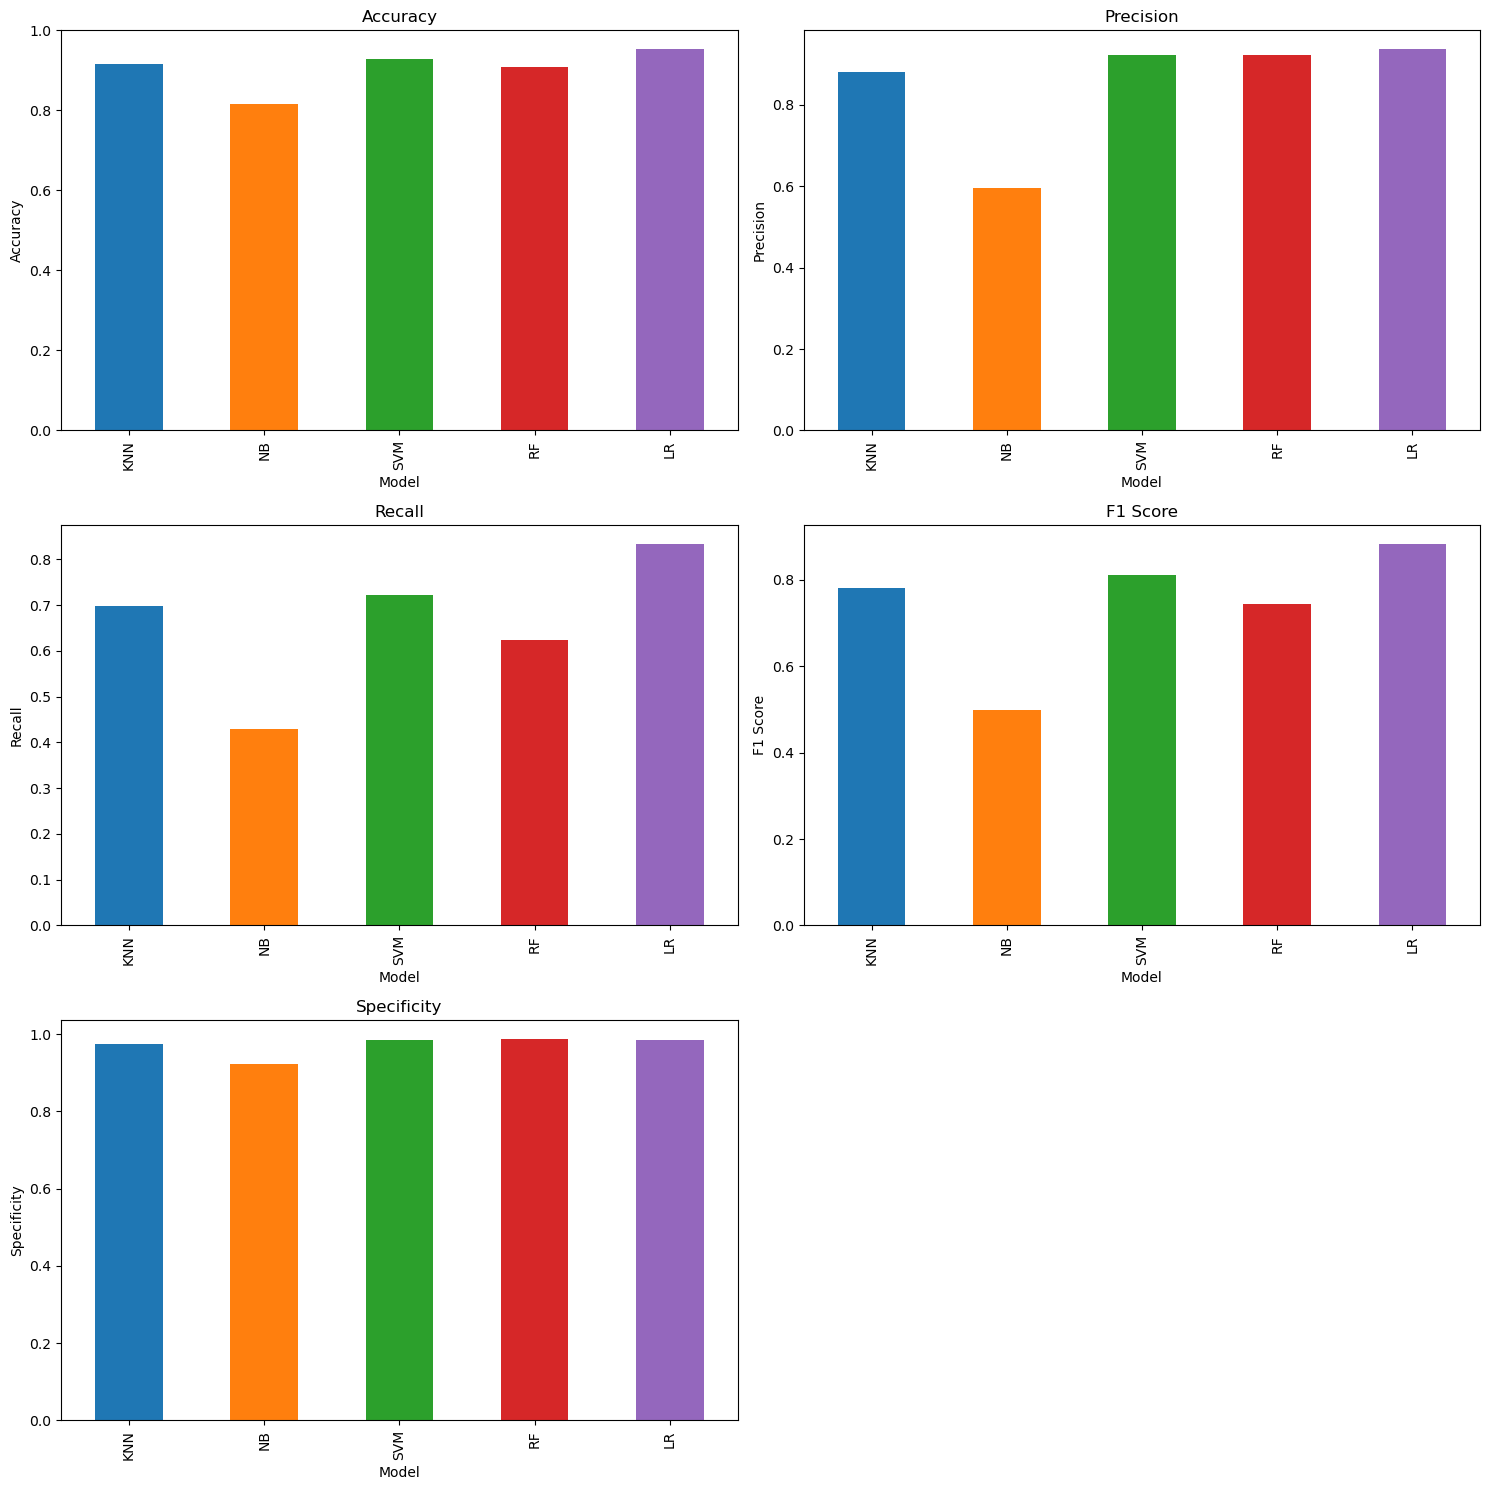

In [23]:
# Import the necessary library
import matplotlib.pyplot as plt
import os
# Plot metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Colors for each model

# Create a directory to save the plots
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, metric in enumerate(metrics_to_plot):
    ax = axs[i // 2, i % 2]
    results_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False, color=colors)
    ax.set_title(metric)
    ax.set_ylabel(metric)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig("Models.png")

# Remove the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()


#### Evaluating saved model on the test data

In [77]:

# Load each model from .pkl files
model_names = ['KNN', 'NB', 'SVM', 'RF', 'LR']
loaded_models = {name: joblib.load(f'{name}_model.pkl') for name in model_names}

test_df = test_df.fillna(0)

# Assume the last column is the label
X_external = test_df.iloc[:, :-1]
y_external = test_df.iloc[:, -1]


# Initialize a list to store evaluation results
evaluation_results = []

# Evaluate each loaded model on the external dataset
for name, model in loaded_models.items():
    y_pred = model.predict(X_external)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_external, y_pred)
    precision = precision_score(y_external, y_pred, average='binary')
    recall = recall_score(y_external, y_pred, average='binary')
    f1 = f1_score(y_external, y_pred, average='binary')
    
    # Store results
    evaluation_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(evaluation_results)

# Display the results
print(results_df)


  Model  Accuracy  Precision  Recall  F1 Score
0   KNN      0.92       0.89    0.68      0.77
1    NB      0.81       0.55    0.47      0.51
2   SVM      0.93       0.94    0.71      0.81
3    RF      0.91       0.94    0.60      0.73
4    LR      0.94       0.91    0.76      0.83


#### Load the external data for predictions 

In [24]:
lr_model = joblib.load('LR_model.pkl')


# Ensure that 'external_data' has the same feature structure as the training data
external_data = external_df.iloc[:, :-1]

# Fill missing values with 0 if needed
external_data = external_data.fillna(0)

# Make predictions using the loaded model
predictions = lr_model.predict(external_data)

actual = np.array(external_df.iloc[:,-1])
active = 0
cnt=0
inact = 0
incnt = 0
for i in range(len(actual)):
    if int(actual[i]) == 1:
        active+=1
        if int(predictions[i]) == 1:
            cnt+=1
    else:
        inact+=1
        if int(predictions[i]) == 0:
            incnt+=1
print('Actual Active Compounds: ',active)
print('Predicted Active: ',cnt)
print('Actual Inactive Compounds: ',inact)
print('Predicted Inactive: ',incnt)

Actual Active Compounds:  663
Predicted Active:  544
Actual Inactive Compounds:  2525
Predicted Inactive:  2481


## Predicting from Databases

#### Input compounds as smiles

In [26]:
import subprocess
from tkinter import filedialog as fd
from tqdm import tqdm

def run_padel(input_file, output_file, padel_jar_path):
    command = [
        'java', '-jar', padel_jar_path,
        '-2d',  # 2D descriptors
        '-removesalt',  # Remove salts
        '-standardizenitro',  # Standardize nitro groups
        '-dir', input_file,  # Directory of input SMILES file
        '-file', output_file  # Output CSV file
    ]

    try:
        subprocess.run(command, check=True)
        print("PaDEL-Descriptor calculation completed successfully.")
    except subprocess.CalledProcessError as e:
        print("Error during PaDEL-Descriptor calculation:", e)

# Define the paths to your files and the PaDEL-Descriptor jar file
input_file = fd.askopenfilename(title='Select Compounds')
output_file = 'drugs.csv'
padel_jar_path = 'PaDEL-Descriptor/PaDEL-Descriptor.jar'

# Calculate the number of molecules in the input file for progress tracking
with open(input_file, 'r') as f:
    num_molecules = sum(1 for line in f)

print("Running PaDEL-Descriptor calculations...")
run_padel(input_file, output_file, padel_jar_path)

    
#Loading sets of features that works best with padel
drugs = pd.read_csv('drugs.csv')
dp = pd.read_csv('metrics.csv')
dp.drop('metrics',axis=1,inplace=True)
names=drugs['Name']
drugs = drugs[dp.columns]

col = dp.columns
df = pd.DataFrame()
for i in col:
    array = np.array(drugs[i])
    mean = dp[i][0]
    std = dp[i][1]
    aa=[]
    #print(aa)
    for j in array:
        n = ((j-mean)/std)
        aa.append(n)
        
        
    df[i]=aa


# Fill missing values with 0 if needed
df = df.fillna(0)

# Make predictions using the loaded model

lr_model = joblib.load('LR_model.pkl')
SVM_model = joblib.load('SVM_model.pkl')
RF_model = joblib.load('RF_model.pkl')
KNN_model = joblib.load('KNN_model.pkl')

LRpred = lr_model.predict(df)
SVMpred = SVM_model.predict(df)
RFpred = RF_model.predict(df)
KNNpred = KNN_model.predict(df)

dfd = pd.DataFrame(np.array(names), columns=['Compound'])
dfd['LR'] = LRpred
dfd['SVM'] = SVMpred
dfd['RF'] = RFpred
dfd['KNN'] = KNNpred
dfd

Running PaDEL-Descriptor calculations...
PaDEL-Descriptor calculation completed successfully.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8140\1162476193.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i]=aa
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8140\1162476193.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i]=aa
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8140\1162476193.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

,Compound,LR,SVM,RF,KNN
0,Pentoxifylline,1.0,0.0,0.0,0.0
1,4-hydroxyphenyl retinamide,0.0,0.0,0.0,0.0
2,Prochlorperazine,1.0,0.0,1.0,1.0
3,Balapiravir,1.0,1.0,0.0,0.0
4,Bortezomib,1.0,0.0,0.0,0.0
5,Leflunomide,1.0,0.0,0.0,0.0
6,SKI-417616,1.0,0.0,0.0,0.0
7,Celgosivir,1.0,1.0,0.0,0.0
8,UV-4B,1.0,1.0,0.0,0.0
9,2-C-methylcytidine,0.0,0.0,0.0,0.0


In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your data is already loaded into variables X and y
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]

# Handle missing values by replacing NaN with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

# Split the data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

# Define the deep learning model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
class_weights = {0: 1, 1: 6}
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)
y_proba = y_pred.flatten()

# Save the model
model.save('deep_learning_model.h5')

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels, target_names=['Inactive', 'Active'], output_dict=True)
roc_auc = roc_auc_score(y_test, y_proba)

# Prepare DataFrame with metrics
metrics_df = pd.DataFrame(report).transpose()
metrics_df['ROC AUC'] = [roc_auc] * metrics_df.shape[0]

print(metrics_df)


Epoch 1/50
372/372 [==============================] - 2s 4ms/step - loss: 0.7305 - accuracy: 0.8005 - val_loss: 0.4280 - val_accuracy: 0.8131
Epoch 2/50
372/372 [==============================] - 1s 3ms/step - loss: 0.6116 - accuracy: 0.8452 - val_loss: 0.3452 - val_accuracy: 0.8588
Epoch 3/50
372/372 [==============================] - 1s 4ms/step - loss: 0.5636 - accuracy: 0.8597 - val_loss: 0.3146 - val_accuracy: 0.8612
Epoch 4/50
372/372 [==============================] - 1s 3ms/step - loss: 0.5513 - accuracy: 0.8658 - val_loss: 0.3293 - val_accuracy: 0.8753
Epoch 5/50
372/372 [==============================] - 1s 4ms/step - loss: 0.5293 - accuracy: 0.8735 - val_loss: 0.3471 - val_accuracy: 0.8659
Epoch 6/50
372/372 [==============================] - 1s 4ms/step - loss: 0.5006 - accuracy: 0.8826 - val_loss: 0.3255 - val_accuracy: 0.8844
Epoch 7/50
372/372 [==============================] - 1s 3ms/step - loss: 0.4829 - accuracy: 0.8912 - val_loss: 0.3423 - val_accuracy: 0.8669
Epoch 

C:\Users\Administrator\anaconda3\envs\AdamsDS\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('deep_learning_model.h5')

# Make predictions
predictions = model.predict(df)
binary_predictions = (predictions > 0.5).astype(int)
dfd['DNN'] = binary_predictions
dfd

1/1 [==============================] - 0s 54ms/step


,Compound,LR,SVM,RF,KNN,DNN
0,Pentoxifylline,1.0,0.0,0.0,0.0,0
1,4-hydroxyphenyl retinamide,0.0,0.0,0.0,0.0,0
2,Prochlorperazine,1.0,0.0,1.0,1.0,0
3,Balapiravir,1.0,1.0,0.0,0.0,1
4,Bortezomib,1.0,0.0,0.0,0.0,0
5,Leflunomide,1.0,0.0,0.0,0.0,0
6,SKI-417616,1.0,0.0,0.0,0.0,0
7,Celgosivir,1.0,1.0,0.0,0.0,1
8,UV-4B,1.0,1.0,0.0,0.0,1
9,2-C-methylcytidine,0.0,0.0,0.0,0.0,0


In [6]:
import subprocess
from tkinter import filedialog as fd
from tqdm import tqdm

# Open file dialog to select SMILES file
file_path = filedialog.askopenfilename(title="Select SMILES file", filetypes=[("SMILES files", "*.smi"), ("All files", "*.*")])

if file_path:
    # Read the SMILES file into a DataFrame
    df = pd.read_csv(file_path, delimiter='\t', header=None, names=['Smiles', 'Compound'])

    # Reorder columns to have 'Compound Name' first
    df = df[['Compound', 'Smiles']]

    # Specify the path where the DataFrame should be saved
    save_path = "compounds.csv"
    
    # Save the DataFrame
    df.to_csv(save_path, index=False)


# Load the CSV file into a DataFrame
compounds_df = pd.read_csv('compounds.csv')

# Extract the 'Smiles' column
smiles_data = compounds_df['Smiles']

# Save the 'Smiles' data into a .smi file
with open('drug.smi', 'w') as file:
    for smile in smiles_data:
        file.write(f"{smile}\n")




def run_padel(input_file, output_file, padel_jar_path):
    command = [
        'java', '-jar', padel_jar_path,
        '-2d',  # 2D descriptors
        '-removesalt',  # Remove salts
        '-standardizenitro',  # Standardize nitro groups
        '-dir', input_file,  # Directory of input SMILES file
        '-file', output_file  # Output CSV file
    ]

    try:
        subprocess.run(command, check=True)
        print("PaDEL-Descriptor calculation completed successfully.")
    except subprocess.CalledProcessError as e:
        print("Error during PaDEL-Descriptor calculation:", e)

# Define the paths to your files and the PaDEL-Descriptor jar file
input_file = 'drug.smi'
output_file = 'drugs.csv'
padel_jar_path = 'PaDEL-Descriptor/PaDEL-Descriptor.jar'

# Calculate the number of molecules in the input file for progress tracking
with open(input_file, 'r') as f:
    num_molecules = sum(1 for line in f)

print("Running PaDEL-Descriptor calculations...")
run_padel(input_file, output_file, padel_jar_path)

    


Running PaDEL-Descriptor calculations...
Error during PaDEL-Descriptor calculation: Command '['java', '-jar', 'PaDEL-Descriptor/PaDEL-Descriptor.jar', '-2d', '-removesalt', '-standardizenitro', '-dir', 'drug.smi', '-file', 'drugs.csv']' returned non-zero exit status 1.


In [7]:
#Loading sets of features that works best with padel
compounds_df = pd.read_csv('compounds.csv')
drugs = pd.read_csv('drugs.csv')
dp = pd.read_csv('metrics.csv')
dp.drop('metrics',axis=1,inplace=True)
names=drugs['Name']
drugs = drugs[dp.columns]

col = dp.columns
df = pd.DataFrame()
for i in col:
    array = np.array(drugs[i])
    mean = dp[i][0]
    std = dp[i][1]
    aa=[]
    #print(aa)
    for j in array:
        n = ((j-mean)/std)
        aa.append(n)
        
        
    df[i]=aa


# Fill missing values with 0 if needed
df = df.fillna(0)

# Make predictions using the loaded model
print('Loading Predictors')
lr_model = joblib.load('LR_model.pkl')
SVM_model = joblib.load('SVM_model.pkl')
RF_model = joblib.load('RF_model.pkl')
KNN_model = joblib.load('KNN_model.pkl')

LRpred = lr_model.predict(df)
SVMpred = SVM_model.predict(df)
RFpred = RF_model.predict(df)
KNNpred = KNN_model.predict(df)

dfd = pd.DataFrame(np.array(names), columns=['Compound'])
dfd['LR'] = LRpred
dfd['SVM'] = SVMpred
dfd['RF'] = RFpred
dfd['KNN'] = KNNpred


import re
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text for text in re.split('(\d+)', s)]

# Sort the DataFrame using the natural sort key
dfd = dfd.sort_values(by='Compound', key=lambda col: col.map(natural_sort_key))

com = compounds_df
comp = []
smi = []
for i in range(len(dfd)):
    comp.append(com['Compound'][i])
    smi.append(com['Smiles'][i])

Predicted = pd.DataFrame(np.array(comp), columns=['Compound'])
Predicted['Smiles'] = smi
to_add = ['LR', 'SVM', 'RF', 'KNN']
Predicted[to_add] = dfd[to_add]
Predicted

condition = (Predicted['LR'] == 1) & (Predicted['SVM'] == 1)

# Apply the condition to filter the DataFrame
filtered_df = Predicted[condition]
filtered_df = filtered_df.reset_index(drop=True)


smiles_d = filtered_df['Smiles']

# Save the 'Smiles' data into a .smi file
with open('Predicted_Active.smi', 'w') as file:
    for smile in smiles_d:
        file.write(f"{smile}\n")

filtered_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9316\3345002924.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i]=aa
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9316\3345002924.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i]=aa
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9316\3345002924.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

Loading Predictors


,Compound,Smiles,LR,SVM,RF,KNN
0,scopoletin,COc1cc2ccc(=O)oc2cc1O,1.0,1.0,0.0,1.0
1,9-O-beta-xylopyranosyl-(1→6)-O-beta-glucopyran...,O[C@@H]1C(CO[C@H]2OC(CO[C@@]3(O)OC[C@H](C([C@@...,1.0,1.0,0.0,1.0
2,syringin,OC/C=C/c1cc(OC)c(c(c1)OC)O[C@@H]1O[C@H](CO)[C@...,1.0,1.0,1.0,1.0
3,4-O-beta-glucopyranosyl dehydrodiconiferyl alc...,OC/C=C/c1cc(OC)c2c(c1)[C@H](CO)[C@H](O2)c1ccc(...,1.0,1.0,0.0,1.0
4,7-O-beta-glucopyranosyl benzyl alcohol,OCC1O[C@@](O)(O[C@H](c2ccccc2)O)[C@H](C([C@@H]...,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
190,"3alpha-hydroxylup-20(29)-ene-23,28-dioic acid ...",CCC(=C)[C@@H]1CC[C@]2([C@H]1[C@H]1CC[C@H]3[C@@...,1.0,1.0,1.0,1.0
191,"3alpha-hydroxylup-20(29)-ene-23,28-dioic acid ...",CCC(=C)[C@@H]1CC[C@]2([C@H]1[C@H]1CC[C@H]3[C@@...,1.0,1.0,1.0,1.0
192,3-epi-betulinic acid 3-O-beta-D-glucopyranoside,CCC(=C)[C@@H]1CC[C@]2([C@H]1[C@H]1CC[C@H]3[C@@...,1.0,1.0,1.0,1.0
193,3-O-[alpha-L-rhamnopyranosyl-(1→2)-beta-D-gluc...,OCC1O[C@@](O)(OCC2O[C@@](O)(OC(=O)[C@@H]3CC(C)...,1.0,1.0,1.0,1.0


In [5]:
filtered_df.to_csv('EastAfrica_Dengue_Actives.csv')